In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from statsmodels.formula.api import ols
import folium


%matplotlib inline

In [631]:
df = pd.read_csv("data/kc_house_data.csv")

In [659]:
folium.Map(location = [47.6062,-122.3321], zoom_start = 9)

In [632]:
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [633]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [634]:
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [635]:
df['condition'] = df['condition'].astype(float)

In [636]:
df = df.fillna(0)

In [637]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [638]:
df = df.drop(columns=['id'])

In [639]:
df['has_basement1'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [640]:
df['has_basement1'] = df['has_basement1'].astype(float)

In [641]:
df['has_basement'] = np.where(df['has_basement1']>0, 1, 0)

In [642]:
df = df.drop(columns=['has_basement1'])

In [643]:
df['devland'] = df['sqft_living']/df['sqft_lot']
# df['']

In [644]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,devland
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,...,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.178264,0.123063
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,...,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.158412,0.026798
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,...,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.159863,0.287015
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,...,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.201198,0.076988
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,...,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034889,-0.252601
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,...,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.252465,0.556700
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,...,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.039220,-0.029806
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,...,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.176905,-0.002224
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,...,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.130542,-0.156501
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,...,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981,0.050701,0.191398


<AxesSubplot:>

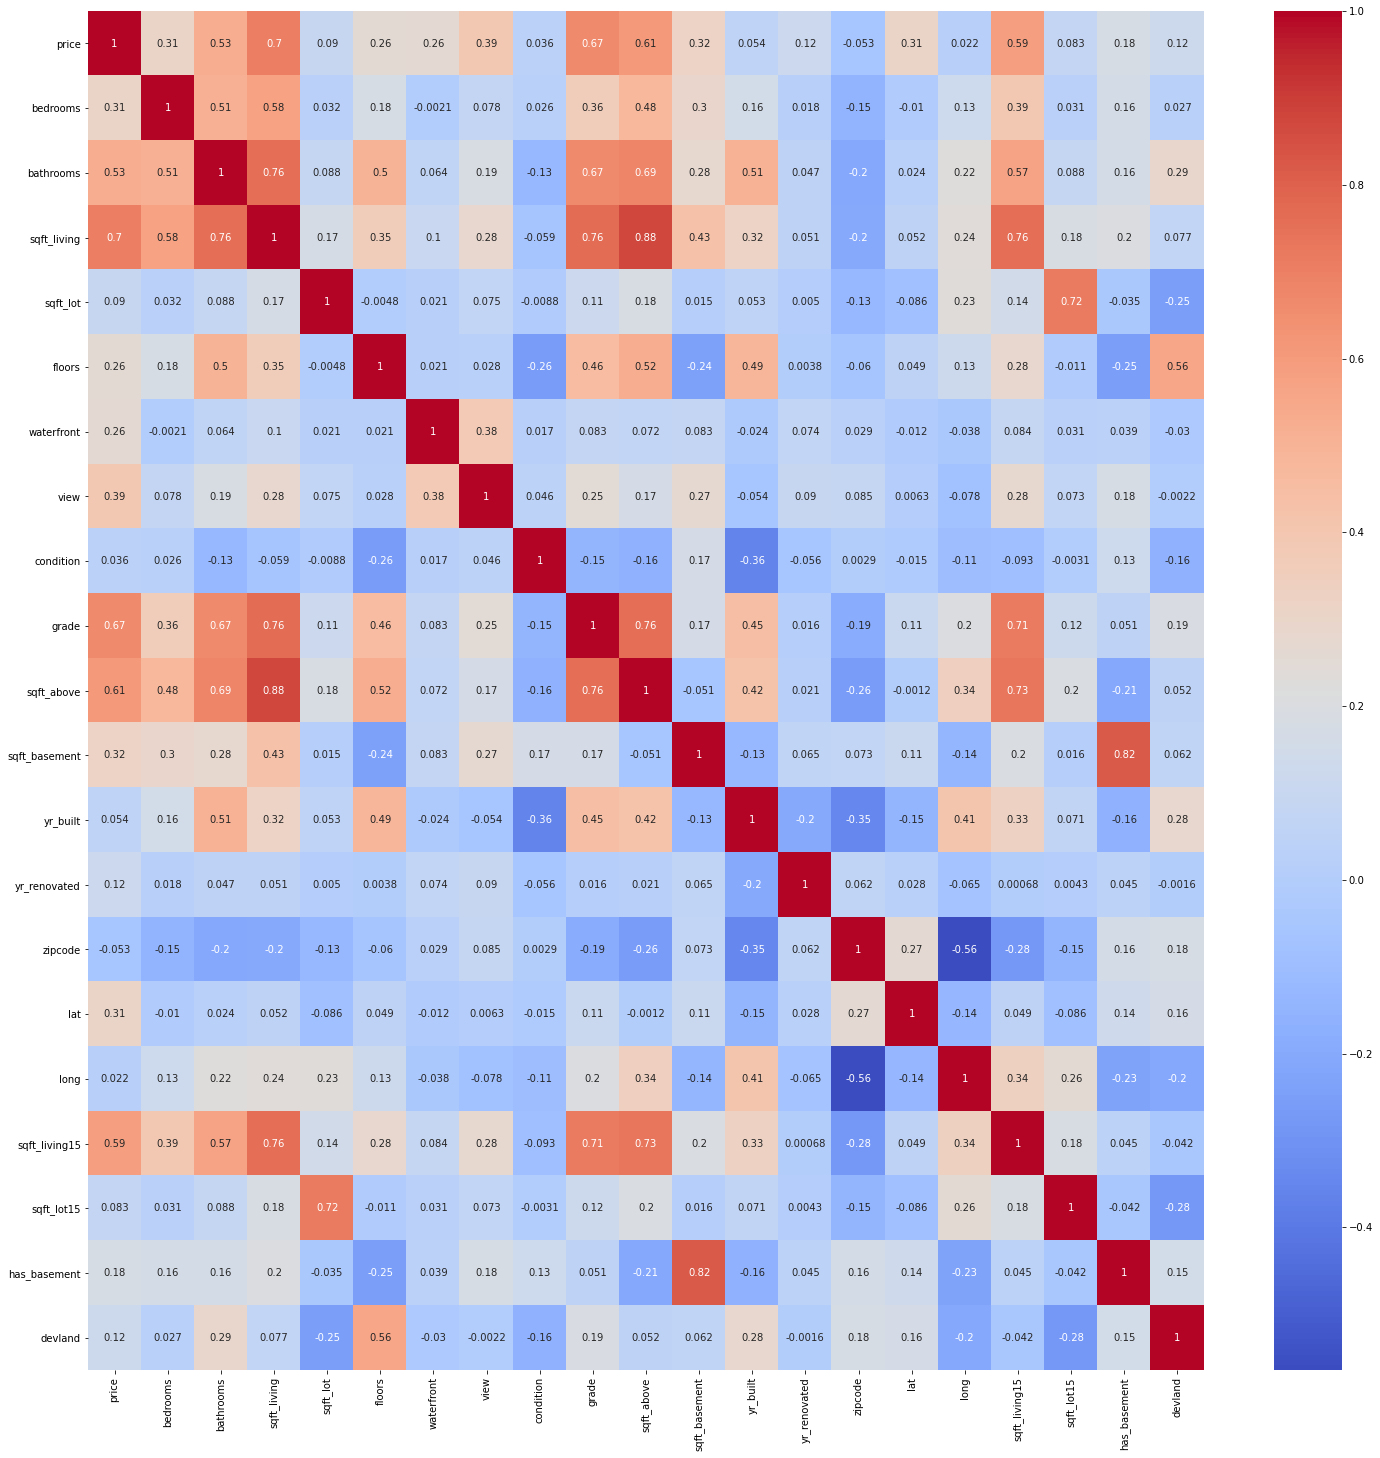

In [645]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
# pd.plotting.scatter_matrix(df, figsize=(40,40))

In [646]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(df_log.corr(), cmap='coolwarm', annot=True)

In [647]:
dfy = pd.DataFrame([])
dfy['price_log']         = np.log(df['price'])
dfy['bedrooms_log']      = np.log(df['bedrooms'])
dfy['bathrooms_log']     = np.log(df['bathrooms'])
dfy['sqft_lot_log']      = np.log(df['sqft_lot'])
dfy['floors_log']        = np.log(df['floors'])
dfy['sqft_above_log']    = np.log(df['sqft_above'])
dfy['yr_built_log']      = np.log(df['yr_built'])
dfy['sqft_living15_log'] = np.log(df['sqft_living15'])
dfy['sqft_lot15_log']    = np.log(df['sqft_lot15'])
dfy['devland_log']       = np.log(df['devland'])

df['price_log']         = np.log(df['price'])
df['bedrooms_log']      = np.log(df['bedrooms'])
df['bathrooms_log']     = np.log(df['bathrooms'])
df['sqft_lot_log']      = np.log(df['sqft_lot'])
df['floors_log']        = np.log(df['floors'])
df['sqft_above_log']    = np.log(df['sqft_above'])
df['yr_built_log']      = np.log(df['yr_built'])
df['sqft_living15_log'] = np.log(df['sqft_living15'])
df['sqft_lot15_log']    = np.log(df['sqft_lot15'])
df['devland_log']       = np.log(df['devland'])

In [648]:
dfx = df[['price','bedrooms_log','bathrooms','sqft_living','sqft_lot_log','waterfront','view','condition','grade','yr_built','devland_log']]

In [660]:
formula = "price ~ bedrooms_log+bathrooms+sqft_living+sqft_lot_log+waterfront+view+condition+grade+yr_built+devland_log"
testy = ols(formula = formula, data = dfx).fit()
testy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     4620.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:18:32   Log-Likelihood:            -2.9503e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21586   BIC:                         5.902e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.935e+06   1.39e+05     64.273      0.000    8.66e+06    9.21e+06
bedrooms_log -4.178e+04   6834.123     -6.114      0.000   -5.52e+04   -2.84e+04
bathrooms      5.26e+04   3269.757     16.086      0.000    4.62e+04     5.9e+04
sqft_living    369.4154      5.660     65.268      0.000     358.321     380.509
sqft_lot_log -5.183e+05   1.25e+04    -41.469      0.000   -5.43e+05   -4.94e+05
waterfront    6.023e+05   1.87e+04     32.280      0.000    5.66e+05    6.39e+05
view          4.303e+04   2113.749     20.356      0.000    3.89e+04    4.72e+04
condition     2.614e+04   2350.765     11.121      0.000    2.15e+04    3.08e+04
grade         1.324e+05   2023.925     65.440      0.000    1.28e+05    1.36e+05
yr_built     -3237.0693     62.898    -51.466      0.000   -3360.353   -3113.785
devland_log  -4.845e+05   1.24e+04    -38.929      0.000   -5.09e+05    -4.6e+05
==============================================================================
Omnibus:                    11727.775   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405207.188
Skew:                           2.004   Prob(JB):                         0.00
Kurtosis:                      23.838   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""